In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
colors = {}
colors['QCD'] = '#1f77b4'
colors['VBF'] = '#ff7f0e'
colors['VV'] = '#2ca02c'
colors['Wjets'] = '#d62728'
colors['WH'] = '#9467bd'
colors['Zjets'] = '#8c564b'
colors['ZH'] = '#e377c2'
colors['ggF'] = '#7f7f7f'
colors['ttbar'] = '#bcdb22'
colors['singlet'] = '#bcdb22'
colors['ttH'] = '#17becf'

In [3]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

nfiles_mc = {}
nfiles_mc['2016'] = 64
nfiles_mc['2017'] = 89
nfiles_mc['2018'] = 106

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [4]:
year = '2018'
outsum = processor.dict_accumulator()

In [5]:
# Higgs mass window
mbb_min = 110
mbb_max = 138

In [6]:
def significance(s,b):
    if b==0:
        return 0
    z_squared = 2.0*(s+b)*np.log(1.0+1.0*s/b) - 2.0*s
    return np.sqrt(z_squared)

In [7]:
def yield_plot(sr, name):
    
    nggF_sel = sr[('ggF',)]
    nVBF_sel = sr[('VBF',)]
    nWH_sel = sr[('WH',)]
    nZH_sel = sr[('ZH',)]
    nttH_sel = sr[('ttH',)]
    
    nQCD_sel = sr[('QCD',)]
    nVV_sel = sr[('VV'),]
    nWjets_sel = sr[('Wjets',)]
    nZjets_sel = sr[('Zjets',)]
    nttbar_sel = sr[('ttbar',)]
    nst_sel = sr[('singlet',)]

    sr_name = name+'-like'
    categories = [sr_name]
    
    yields = {}
    yields['ttH'] = [nttH_sel]
    yields['ZH'] = [nZH_sel]
    yields['WH'] = [nWH_sel]
    yields['VBF'] = [nVBF_sel]
    yields['ggF'] = [nggF_sel]
               
    yields['VV'] = [nVV_sel]
    yields['ttbar'] = [nttbar_sel]
    yields['singlet'] = [nst_sel]
    yields['Wjets'] = [nWjets_sel]
    yields['Zjets'] = [nZjets_sel]
    yields['QCD'] = [nQCD_sel]
    
    with open(year+'/plot-all/'+name+'_yield.json', 'w') as outfile:
        json.dump(yields, outfile)
    
    print(yields)
    
    y = [0]
    for p in ['ttH','ZH','WH','VBF','ggF','VV','Wjets','Zjets','QCD','ttbar','singlet']:
        bars = y
        if p == 'ttH':
            plt.bar(categories, yields[p], width=1, color=colors[p], label=p)
        else:
            plt.bar(categories, yields[p], width=1, color=colors[p], bottom=bars, label=p)
            
        y = [y[0]+yields[p][0]]

    plt.ylabel('Events')
    plt.yscale('log')
    plt.ylim(0.1,100000)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    png_name = year+'/plot-all/'+name+'_yield.png'
    plt.savefig(png_name,bbox_inches='tight')
    
    pdf_name = year+'/plot-all/'+name+'_yield.pdf'
    plt.savefig(pdf_name,bbox_inches='tight')

In [8]:
def plot_overlay(x,name):
    x.label = 'Events'
    axes = hist.plotgrid(x, overlay='process', line_opts={}, order=['QCD','Zjets','Wjets','ttbar','singlet','VV','ggF','VBF','WH','ZH','ttH'])
    axes[0, 0].set_prop_cycle(cycler(color=colors.values()))
    axes[0, 0].set_yscale('log')
    axes[0, 0].set_ylim(.001, 100000)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    png_name = year+'/plot-all/'+name+'.png'
    plt.savefig(png_name,bbox_inches='tight')
    pdf_name = year+'/plot-all/'+name+'.pdf'
    plt.savefig(pdf_name,bbox_inches='tight')

In [9]:
def plot_stack(x,name):
    x.label = 'Events'
    axes = hist.plot1d(x, overlay='process', fill_opts={'edgecolor': (0,0,0,1)}, stack=True, order=['ttH','ZH','WH','VBF','ggF','VV','ttbar','singlet','Wjets','Zjets','QCD'])
    axes.set_prop_cycle(cycler(color=colors.values()))
    axes.set_yscale('log')
    axes.set_ylim(.001, 100000)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    png_name = year+'/plot-all/'+name+'_stack.png'
    plt.savefig(png_name,bbox_inches='tight')
    pdf_name = year+'/plot-all/'+name+'_stack.pdf'
    plt.savefig(pdf_name,bbox_inches='tight')

In [10]:
# Load all MC
for n in range(1,nfiles_mc[year]+1):
    print(n)
    filename = 'condor/outfiles/'+year+'_'+str(n)+'.coffea'
    if os.path.isfile(filename):
        out = util.load(filename)
        outsum.add(out)
    else:
        print("File " + filename + " is missing")
        
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['templates2'].scale(scale_lumi, 'dataset')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


In [11]:
templates = outsum['templates2'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('region', 'signal').integrate('ddb1',int_range=slice(0.89,1))

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f6073896160>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


In [12]:
x = templates.sum('mjj','qgl1','qgl2','msd1')

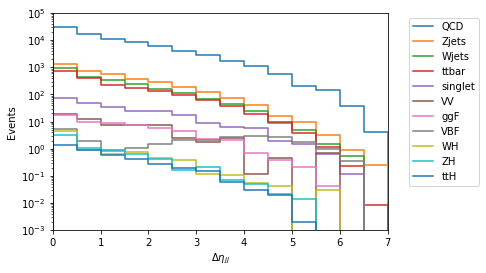

In [13]:
plot_overlay(x,'deta')

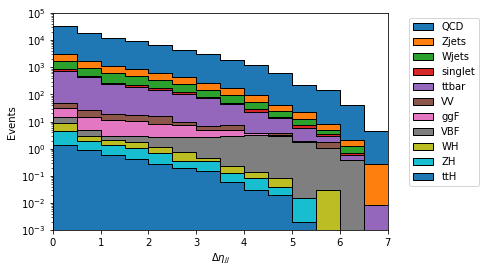

In [14]:
plot_stack(x,'deta')

In [15]:
x = templates.sum('deta','qgl1','qgl2','msd1')

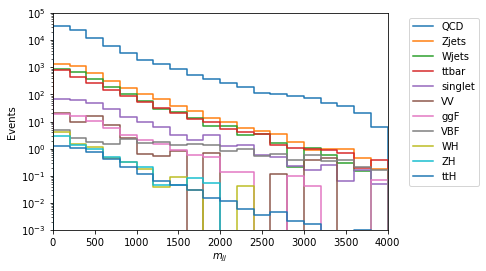

In [16]:
plot_overlay(x,'mjj')

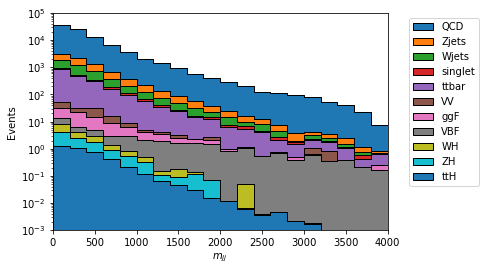

In [17]:
plot_stack(x,'mjj')

In [18]:
x = templates.sum('deta','mjj','qgl2','msd1')

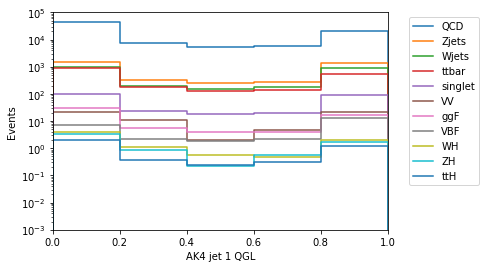

In [19]:
plot_overlay(x,'qgl1')

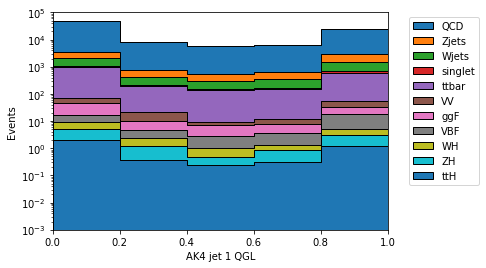

In [20]:
plot_stack(x,'qgl1')

In [21]:
x = templates.sum('deta','mjj','qgl1','msd1')

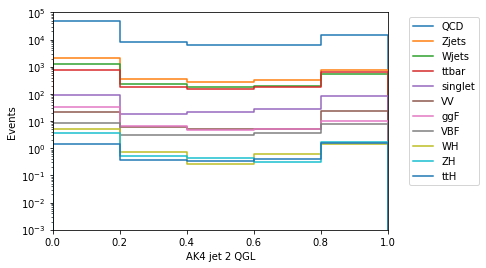

In [22]:
plot_overlay(x,'qgl2')

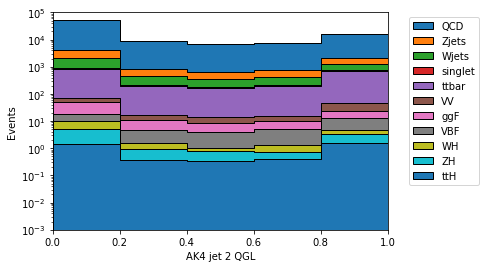

In [23]:
plot_stack(x,'qgl2')

In [24]:
templates_window=templates.sum('qgl1','qgl2').integrate('msd1',int_range=slice(mbb_min,mbb_max))

In [25]:
if year == '2017':

    cuts = []
    sigs = []

    deta_slices = [i*0.5 for i in range(0,14)]
    mjj_slices = [i*200 for i in range(0,20)]

    for deta in deta_slices:
        for mjj in mjj_slices:
            sliced = templates_window.integrate('deta',int_range=slice(deta,7)).integrate('mjj',int_range=slice(mjj,4000))
            s = sliced.values()[('VBF',)]
            b = sliced.values()[('ggF',)] + sliced.values()[('ZH',)] + sliced.values()[('WH',)] + sliced.values()[('ttH',)] 
            b += sliced.values()[('QCD',)] + sliced.values()[('Wjets',)] + sliced.values()[('Zjets',)] + sliced.values()[('VV',)] + sliced.values()[('ttbar',)] + sliced.values()[('singlet',)]
            
            sigs += [significance(s,b)]
            cuts += [[mjj, deta]]
        
    cuts = np.array(cuts)
    print(max(sigs))
    print(cuts[np.argmax(sigs)])
    mjj_cut = cuts[np.argmax(sigs)][0]
    deta_cut = cuts[np.argmax(sigs)][1]

    plt.hist2d(cuts[:,0], cuts[:,1], density=False, weights=sigs, bins=[20,14]);
    plt.xlabel('$m_{jj}$');
    plt.ylabel('$\Delta\eta_{jj}$');
    plt.savefig(year+'/plot-all/vbfsigs_2d.png')
    
else:
    mjj_cut = 1000.
    deta_cut = 3.5

{'ttH': [0.0621650757720141], 'ZH': [0.12345451171922121], 'WH': [0.1427762314802401], 'VBF': [8.765314759703939], 'ggF': [2.4432108265852044], 'VV': [0.0], 'ttbar': [20.33037042469192], 'singlet': [4.466162867962935], 'Wjets': [2.4455643193405785], 'Zjets': [5.69463724519855], 'QCD': [696.6081856682204]}


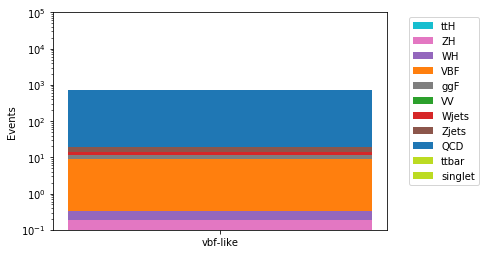

In [26]:
sr = templates_window.integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000)).values()
yield_plot(sr, 'vbf')

In [27]:
# VBF significance
s = sr[('VBF',)] 
b = sr[('QCD',)] + sr[('Zjets',)] + sr[('Wjets',)] + sr[('VV',)] + sr[('ttbar',)] +sr[('singlet',)] + sr[('ggF',)] + sr[('WH',)] + sr[('ZH',)] + sr[('ttH',)]

print(significance(s,b))
# this only makes sense in the mass window of Higgs

0.3232623808670169


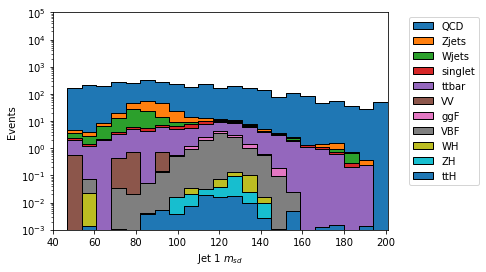

In [28]:
mhist = templates.sum('qgl1','qgl2').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000))
plot_stack(mhist,'vbf-msd1')

In [29]:
templates_cutflow = outsum['templates2'].group('dataset', hist.Cat('process', 'Process'), pmap).integrate('region', 'signal').sum('qgl1','qgl2')

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f6073896160>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


In [30]:
# deta cut
templates_cutflow.sum('msd1','mjj','ddb1').integrate('deta',int_range=slice(deta_cut,7)).values()

{('ZH',): 0.6250177049982105,
 ('WH',): 0.5905414383733332,
 ('ttH',): 0.40440132733026457,
 ('VBF',): 19.375005266604703,
 ('ggF',): 6.210494888155505,
 ('QCD',): 236514.84650419833,
 ('VV',): 65.91182181404852,
 ('Wjets',): 4605.371403083272,
 ('Zjets',): 2151.443023583558,
 ('ttbar',): 647.3959090850902,
 ('singlet',): 140.51106290014363}

In [31]:
# mjj cut
templates_cutflow.sum('msd1','ddb1').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000)).values()

{('ZH',): 0.5445492556416814,
 ('WH',): 0.4695432361086326,
 ('ttH',): 0.3634765438234542,
 ('VBF',): 18.430915062941086,
 ('ggF',): 5.4466259327080495,
 ('QCD',): 193905.6315486898,
 ('VV',): 50.33412116973233,
 ('Wjets',): 3779.7659879292337,
 ('Zjets',): 1769.6372175171664,
 ('ttbar',): 582.0637377256141,
 ('singlet',): 122.23213043445783}

In [32]:
#ddb cut
templates_cutflow.sum('msd1').integrate('deta',int_range=slice(deta_cut,7)).integrate('mjj',int_range=slice(mjj_cut,4000)).integrate('ddb1',int_range=slice(0.89,1)).values()

{('ZH',): 0.15623379193199066,
 ('WH',): 0.1868597752090737,
 ('ttH',): 0.10000720830208253,
 ('VBF',): 11.13213676921478,
 ('ggF',): 2.9496466247021584,
 ('QCD',): 3205.6190845280757,
 ('VV',): 2.2633029460577343,
 ('Wjets',): 69.06093426073201,
 ('Zjets',): 121.4459493490431,
 ('ttbar',): 61.89244176695857,
 ('singlet',): 14.822747896866527}

In [33]:
tot_H = 0
VBF = 0

# 2016
tot_H += 0.11200184045191053 + 0.12120260059879256 + 0.07263116639897552 + 6.891715563032644 + 1.3295306084543466
VBF += 6.891715563032644

# 2017
tot_H += 0.04791347363778449 + 0.14978995471323825 + 0.08345095581951315 + 8.932213622583694 + 2.347177783514918
VBF += 8.932213622583694

# 2018
tot_H += 0.15623379193199066 + 0.1868597752090737 + 0.10000720830208253 + 11.13213676921478 + 2.9496466247021584
VBF += 11.13213676921478

print(VBF/tot_H)

0.7787954297692927


In [34]:
np.sqrt(0.243**2 + 0.356**2 +  0.323**2)

0.5386223166561148